In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Text(0, 0.5, 'dRadius')

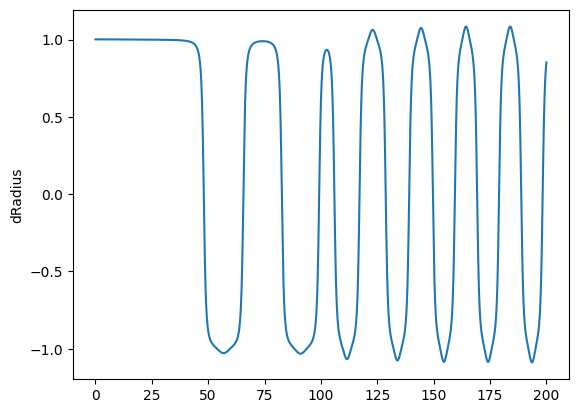

In [ ]:
G = 6.67e-11
rho0 = 1e5
Msun = 1e30
Rsun = 7e8

def rho(r):
    return(rho0 * (1 - (r/Rsun)**2))
def m(r):
    return(4/3 * np.pi * r**3 * rho(r))
def dPdr(r):
    return(-G * m(r)*rho(r) / r**2)

class Star(object):
    def __init__(self,M,R):
        self.M = M
        self.R = R

    def __call__(self,init,t):
        radius = init[0]
        velocity = init[1]
        d_radius = velocity
        d_velocity = (-G*self.M/radius**2) + dPdr(radius)
        return np.array([d_radius, d_velocity], float)

    
star = Star(Msun,Rsun)

tstart = 0
tstop = 200
N = 5000
h = (tstop-tstart)/N

xpnt = []
ypnt = []
t = np.linspace(tstart,tstop,N)
init = np.array([Rsun*1.001,0],float)

for i in t:
    xpnt.append(init[0])
    ypnt.append(init[1])
    k1 = h*star(init,i)
    k2 = h*star(init + 0.5*k1, i + 0.5*h)
    k3 = h*star(init + 0.5*k2, i + 0.5*h)
    k4 = h*star(init + k3, i + h)
    init += 1/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.plot((t),(np.array(xpnt))/(Rsun))
plt.ylabel('dRadius')


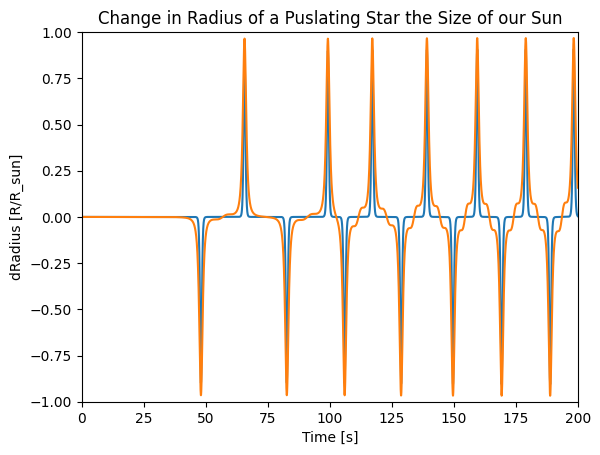

In [8]:
plt.plot((t),np.array(ypnt)**3/ Rsun**3)
plt.plot((t),np.array(ypnt)/ Rsun)
# plt.plot(t,(np.array(xpnt)**2 * sigma * 5000**4))
plt.xlim(0,200)
plt.ylim(-1,1)
# plt.plot(t,ypnt)
plt.title("Change in Radius of a Puslating Star the Size of our Sun")
plt.ylabel('dRadius [R/R_sun]')
plt.xlabel('Time [s]')
plt.savefig("Oscillation.png")